In [3]:
import numpy as np
import matplotlib.pyplot as plt
import beaconsHelper
import trilateration
import CoreLocation

RSSIData(3)@0.344221830368: rssi=-58.0
RSSIData(3)@0.844444036484: rssi=-52.0
RSSIData(3)@1.84523797035: rssi=-53.5
RSSIData(3)@2.84493279457: rssi=-58.5
RSSIData(2)@3.84429502487: rssi=-57.5
RSSIData(3)@4.84453606606: rssi=-59.0
RSSIData(3)@7.844810009: rssi=-60.0
RSSIData(7)@24.8488681316: rssi=-60.0
RSSIData(7)@25.8439948559: rssi=-60.0
RSSIData(2)@40.8445289135: rssi=-53.0
RSSIData(2)@41.8448269367: rssi=-55.0
RSSIData(9)@72.0436179638: rssi=-59.5
RSSIData(9)@75.0441420078: rssi=-59.5
RSSIData(3)@86.0434548855: rssi=-56.5
RSSIData(3)@87.046446085: rssi=-55.0
RSSIData(3)@88.0435020924: rssi=-56.0
RSSIData(3)@89.0450649261: rssi=-57.0


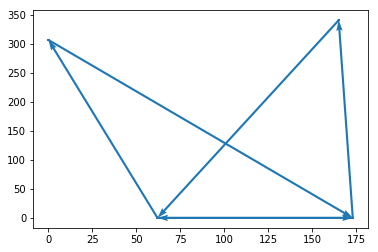

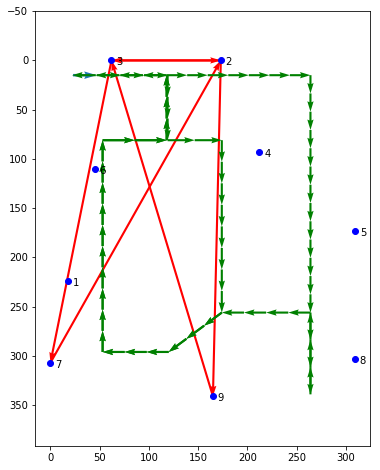

In [14]:
label = "cattalyya-13-vertical"
data = beaconsHelper.load_rssi_data(label)

data_by_id = {}
rssi_data_by_timestamp = beaconsHelper.get_rssi_data_by_timestamp(data, adjust_time=True)
# print(len(rssi_data_by_timestamp.keys()))
# print list(sorted(rssi_data_by_timestamp.keys()))


subject_name = "cattalyya"
threshold = -60
room = CoreLocation.Room.import_room_data('room_measurement.json', "G5-may13")
beacon_locations = room.beacons.get_dict_by_label()
predicted_locations = CoreLocation.Locations(subject=subject_name)

for beacon_id in range(1, 10):
    ibeacon = beaconsHelper.get_rssi_data_from_id(beacon_id, rssi_data_by_timestamp)
#     print ibeacon
    ibeacon = beaconsHelper.get_smooth_rssi_data(ibeacon, 10, option="median")
#     print "\n\n\n",ibeacon
    data_by_id[beacon_id] = ibeacon
data_by_timestamp = beaconsHelper.convert_rssi_data_by_id_to_timestamp(data_by_id)
# data_by_timestamp = beaconsHelper.convert_to_rough_timestamp(data_by_timestamp)

sorted_time = list(sorted(data_by_timestamp.keys()))
for timestamp in sorted_time:
    best_beacon = None
    for beacon in data_by_timestamp[timestamp]:
        if beacon.rssi < threshold:
            continue
        if not best_beacon:
            best_beacon = beacon
        if beacon.rssi > best_beacon.rssi:
            best_beacon = beacon
    if best_beacon:
        print best_beacon
        loc = beacon_locations[best_beacon.id]
        
    if loc is not None:
        predicted_locations.add_np_point(loc, timestamp)
predicted_locations.visualize()
room.visualize_with_groundtruth(predicted_locations)

In [17]:
def high_rssi_beacons(label, threshold):
    best_beacons = []
    data = beaconsHelper.load_rssi_data(label)

    data_by_id = {}
    rssi_data_by_timestamp = beaconsHelper.get_rssi_data_by_timestamp(data, adjust_time=False)

    room = CoreLocation.Room.import_room_data('room_measurement.json', "G5-may13")
    beacon_locations = room.beacons.get_dict_by_label()
    predicted_locations = CoreLocation.Locations()

    for beacon_id in range(1, 10):
        ibeacon = beaconsHelper.get_rssi_data_from_id(beacon_id, rssi_data_by_timestamp)
    #     print ibeacon
        ibeacon = beaconsHelper.get_smooth_rssi_data(ibeacon, 10, option="median")
    #     print "\n\n\n",ibeacon
        data_by_id[beacon_id] = ibeacon
    data_by_timestamp = beaconsHelper.convert_rssi_data_by_id_to_timestamp(data_by_id)
    # data_by_timestamp = beaconsHelper.convert_to_rough_timestamp(data_by_timestamp)

    sorted_time = list(sorted(data_by_timestamp.keys()))
    for timestamp in sorted_time:
        best_beacon = None
        for beacon in data_by_timestamp[timestamp]:
            if beacon.rssi < threshold:
                continue
            if not best_beacon:
                best_beacon = beacon
            if beacon.rssi > best_beacon.rssi:
                best_beacon = beacon
        if best_beacon:
#             print best_beacon
            best_beacons.append(best_beacon)
#             loc = beacon_locations[best_beacon.id]

#         if loc is not None:
#             predicted_locations.add_np_point(loc, timestamp)
    return best_beacons

In [18]:
label = "cattalyya-13-vertical"
threshold = -60
high_rssi_beacons(label, threshold)

[RSSIData(3)@1526270438.12: rssi=-58.0,
 RSSIData(3)@1526270438.62: rssi=-52.0,
 RSSIData(3)@1526270439.62: rssi=-53.5,
 RSSIData(3)@1526270440.62: rssi=-58.5,
 RSSIData(2)@1526270441.62: rssi=-57.5,
 RSSIData(3)@1526270442.62: rssi=-59.0,
 RSSIData(3)@1526270445.62: rssi=-60.0,
 RSSIData(7)@1526270462.63: rssi=-60.0,
 RSSIData(7)@1526270463.62: rssi=-60.0,
 RSSIData(2)@1526270478.62: rssi=-53.0,
 RSSIData(2)@1526270479.62: rssi=-55.0,
 RSSIData(9)@1526270509.82: rssi=-59.5,
 RSSIData(9)@1526270512.82: rssi=-59.5,
 RSSIData(3)@1526270523.82: rssi=-56.5,
 RSSIData(3)@1526270524.82: rssi=-55.0,
 RSSIData(3)@1526270525.82: rssi=-56.0,
 RSSIData(3)@1526270526.82: rssi=-57.0]